In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

from astropy import constants as const
import warnings
warnings.filterwarnings("ignore")
import math
import time

from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

import scipy
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import multivariate_normal
from scipy.stats import bootstrap
from scipy import interpolate
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'astropy'

In [3]:
dataLI = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\STPM_improved_210721.csv",delimiter=",")
dataEA = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\2024sample_composite.csv",delimiter=",")

dataLInew = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\stpm_230202.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])
dataLI["planet_name"] = planet_name_LI
planet_LI_NEW         = list(dataLInew["Star"]+" "+dataLInew["Planet"])
dataLInew["planet_name"] = planet_LI_NEW
earth_like_rocky  = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")

earth_Mass = const.M_earth.value*1000 #g
earth_Radius = const.R_earth.value*100
earth_Volume = 4/3 * math.pi * earth_Radius**3
earth_density = earth_Mass / earth_Volume

NameError: name 'const' is not defined

In [4]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc
star_eff_LI          = dataLI.Teff_K
pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature

# Luque Impoved New
planet3 = planet_LI_NEW 
# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature
st_eff_EA            = dataEA.st_teff            # Star effective temprature
st_eff_up_EA         = dataEA.st_tefferr1        # Star upper err effective temprature
st_eff_low_EA        = dataEA.st_tefferr2        # Star lower err effective temprature
disc_year_EA         = dataEA.disc_year


In [4]:
planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'GJ 3053 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'CD-60 8051 b', 'L 98-59 c', 'L 98-59 d', 'GJ 3053 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b']
planet1      = []; planet_i1       = []; planet_eq1   = []
disc_year1   = []; st_eff1         = []; st_type1     = []
radius1      = []; radius_up1      = []; radius_low1  = []
mass1        = []; mass_up1        = []; mass_low1    = []
density1     = []; density_up1     = []; density_low1 = []

for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] in planets:
        planet1.append(planet_name_LI[i]); planet_eq1.append(pl_eq_LI[i]);          st_eff1.append(star_eff_LI[i]);
        radius1.append(radius_LI[i]);      radius_up1.append(radius_unc_up_LI[i]);  radius_low1.append(radius_unc_low_LI[i]);
        mass1.append(mass_LI[i]);          mass_up1.append(mass_unc_up_LI[i]);      mass_low1.append(mass_unc_low_LI[i]);
        density1.append(density_LI[i]);    density_up1.append(density_unc_up_LI[i]); density_low1.append(density_unc_low_LI[i]);

NameError: name 'density_cluster_1' is not defined

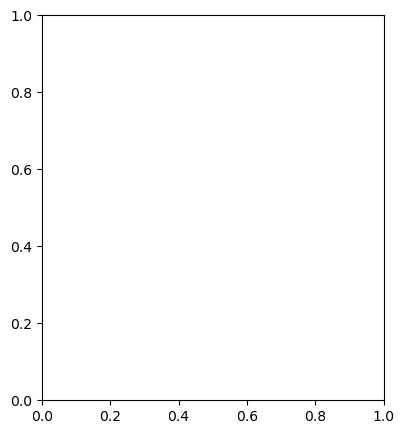

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 3, 1)
bins  = np.linspace(0, 2.1, 20)
pbins = np.linspace(0, 2.1, 100)

hist_values_false, bin_edges, _ = plt.hist(density_cluster_1, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_cluster_1)
sigma = np.sqrt(np.cov(density_cluster_1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_cluster_2, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_cluster_2)
sigma = np.sqrt(np.cov(density_cluster_2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_outliers, bins=bins, color='0.8', alpha=0.5, rwidth=0.9, density=False)
plt.xlim(0,2.5)
plt.ylabel("Number of Planets")
plt.xlabel("Bulk Density $[ρ_{model}]$")
plt.title("Histogram Addition (DBSCAN, 2024)")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

In [6]:
planet_EA_unique = list(set(planet_name_EA))
other_names = ["LHS 1140 b",'LHS 1140 c' ,'L 168-9 b', 'L 168-9 c', "GJ 3053 b","GJ 3053 c"]

radius_4_crit     = []
mass_err_crit     = []
radius_err_crit   = []
stellar_type_crit = []
st_eff_crit       = []
density_crit      = []
for i in range(0,len(planet_name_EA)):
    if planet_name_EA[i] not in planet_name_LI and planet_name_EA[i] not in other_names and planet_name_EA[i]:
        if planet_name_EA[i] not in radius_4_crit and radius_EA[i]<4:
            radius_4_crit.append(planet_name_EA[i])
        if planet_name_EA[i] not in mass_err_crit and ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.50:
            mass_err_crit.append(planet_name_EA[i])    
        if planet_name_EA[i] not in radius_err_crit and ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.50:
            radius_err_crit.append(planet_name_EA[i])   
        if planet_name_EA[i] not in stellar_type_crit and "M" in str(st_spectype_EA[i]):
            stellar_type_crit.append(planet_name_EA[i])   
        if planet_name_EA[i] not in density_crit and True != math.isnan(density_unc_up_EA[i]):
            density_crit.append(planet_name_EA[i])   

list1 = radius_4_crit;   list2 = mass_err_crit; 
list3 = radius_err_crit; list4 = stellar_type_crit; 
list5 = density_crit

common_elements = np.sort(list(set(list1) & set(list2) & set(list3) & set(list4) & set(list5)))

planet2      = []; planet_i2       = []; planet_eq2   = []
disc_year2   = []; st_eff2         = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []

for j in range(0,len(common_elements)):
    target_string = str(common_elements[j])
    indexs = [index for index, value in enumerate(planet_name_EA) if value == target_string]
    i = indexs[0]
    if st_eff_EA[i] < 4000:
        st_eff2.append(st_eff_EA[i])
        planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i]); disc_year2.append(disc_year_EA[i])
        radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
        density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
        mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])


In [10]:
earth_like_rocky_mass_g        = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius_cm     = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density_g_cm3 = (earth_like_rocky_mass_g) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius_cm,3))   ) 

def rocky_density(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density_g_cm3
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def rocky_density2(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density_g_cm3/earth_like_rocky_density_g_cm3
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def h20model_density(mass):
    x_points  = H20_50_500K["Mass"]
    y_points  = H20_50_500K_density_g_cm3/rocky_density(H20_50_500K["Mass"])
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

mass    = np.concatenate((mass1, mass2));       mass_up     = np.concatenate((mass_up1, mass_up2));       mass_low     = np.concatenate((mass_low1, mass_low2));
radius  = np.concatenate((radius1, radius2));   radius_up   = np.concatenate((radius_up1, radius_up2));   radius_low   = np.concatenate((radius_low1, radius_low2));
density = np.concatenate((np.array(density1) / rocky_density(mass1), np.array(density2)/ rocky_density(mass2))); density_up  = np.concatenate((np.array(density_up1)/ rocky_density(mass1), np.array(density_up2)/ rocky_density(mass2))); density_low  = np.concatenate((np.array(density_low1)/ rocky_density(mass1),np.array(density_low2)/ rocky_density(mass2)));

planet_temp = np.concatenate((planet_eq1, planet_eq2));
planet_name = np.concatenate((planet1,    planet2));
star_eff    = np.concatenate((st_eff1,    st_eff2));
disc_year   = np.concatenate((disc_year1,    disc_year2));

mass_err    = [np.abs(mass_low),mass_up]
radius_err  = [np.abs(radius_low),radius_up]
density_err = [np.abs(density_low),density_up]

mass10      = np.log10(mass)
mass10_up   = np.log10(mass + mass_up) - np.log10(mass)
mass10_low  = np.log10(mass + np.abs(mass_low)) - np.log10(mass)
mass10_err  = [mass10_low,mass10_up]

model_rocky_density = np.array(rocky_density(np.array(earth_like_rocky["Mass"])))
model_rocky_mass    = np.array(earth_like_rocky["Mass"])
model_rocky10_mass  = np.array(np.log10(np.array(earth_like_rocky["Mass"])))
model_rocky_radius  = np.array(earth_like_rocky["Radius"])

In [510]:
density1_norm      = np.array(density1) / rocky_density(mass1)
density1_up_norm   = np.array(density_up1)/ rocky_density(mass1)
density1_low_norm  = np.array(density_low1)/ rocky_density(mass1)

mass10_1_norm      = np.log10(mass1)
mass10_1_up_norm   = np.log10(np.array(mass1) + np.array(mass_up1)) - np.log10(mass1)
mass10_1_low_norm  = np.log10(np.array(mass1) + np.array(np.abs(mass_low1))) - np.log10(mass1)


In [517]:
lower_errors = # your array of lower errors
upper_errors = # your array of upper errors

plt.scatter(mass10_1_norm, density1_norm)

for i in range(len(mass1)):
    if density1_norm[i] > 0.6:
        
        plt.erro

0.10628530441992802

In [8]:
density_rock = []; density_water = []; density_gas = []
for i in range(0,len(mass1)):
    if density1_norm[i] > 0.6:
        plt.errorbar(mass10_1_norm[i],density1_norm[i],xerr = [[mass10_1_low_norm[i]],[mass10_1_up_norm[i]]],yerr = [[density1_low_norm[i]],[density1_up_norm[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass10_1_norm[i],density1_norm[i],color = "Sienna")
        density_rock.append(density1_norm[i])
    elif density1_norm[i] < 0.4:
        plt.errorbar(mass10_1_norm[i],density1_norm[i],xerr = [[mass10_1_low_norm[i]],[mass10_1_up_norm[i]]],yerr = [[density1_low_norm[i]],[density1_up_norm[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass10_1_norm[i],density1_norm[i],color = "lightskyblue")     
        density_water.append(density1_norm[i])
    else:
        plt.errorbar(mass10_1_norm[i],density1_norm[i],xerr = [[mass10_1_low_norm[i]],[mass10_1_up_norm[i]]],yerr = [[density1_low_norm[i]],[density1_up_norm[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass10_1_norm[i],density1_norm[i],color = "cornflowerblue")
        density_gas.append(density1_norm[i])

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('$ρ / ρ_{⊕,model}$')


NameError: name 'density1_norm' is not defined

NameError: name 'density1_norm' is not defined

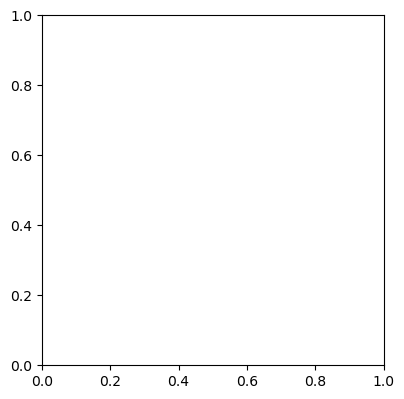

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2, 3, 1)
density_rock = []; density_water = []; density_gas = []
for i in range(0,len(mass1)):
    if density1_norm[i] > 0.6:
        plt.errorbar(mass1[i],density1_norm[i],xerr = [[mass_low1[i]],[mass_up1[i]]],yerr = [[density1_low_norm[i]],[density1_up_norm[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass1[i],density1_norm[i],color = "Sienna")
        density_rock.append(density1_norm[i])
    elif density1_norm[i] < 0.4:
        plt.errorbar(mass1[i],density1_norm[i],xerr = [[mass_low1[i]],[mass_up1[i]]],yerr = [[density1_low_norm[i]],[density1_up_norm[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass1[i],density1_norm[i],color = "lightskyblue")     
        density_water.append(density1_norm[i])
    else:
        plt.errorbar(mass1[i],density1_norm[i],xerr = [[mass_low1[i]],[mass_up1[i]]],yerr = [[density1_low_norm[i]],[density1_up_norm[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass1[i],density1_norm[i],color = "cornflowerblue")
        density_gas.append(density1_norm[i])

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('$ρ / ρ_{⊕,model}$')
plt.plot(earth_like_rocky["Mass"],np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")
plt.xscale("log")
plt.ylim(0,1.5)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.subplot(2, 3, 2)
bins  = np.linspace(0, 1.5, 20)
pbins = np.linspace(0, 1.5, 100)
hist_values_false, bin_edges, _ = plt.hist(density_rock, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rock)
sigma = np.sqrt(np.cov(density_rock, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_water, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water)
sigma = np.sqrt(np.cov(density_water, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_gas, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_gas)
sigma = np.sqrt(np.cov(density_gas, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))
plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
plt.title('Normalized: 34 Planets from L&P')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.subplot(2, 3, 3)
hist_values_false, bin_edges, _ = plt.hist(density_rock, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rock)
sigma = np.sqrt(np.cov(density_rock, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_water, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water)
sigma = np.sqrt(np.cov(density_water, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_gas, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_gas)
sigma = np.sqrt(np.cov(density_gas, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
plt.title('Not Normalized: 34 Planets from L&P')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)

    
plt.subplot(2, 3, 4)
density_rock = []; density_water = []; density_gas = []
for i in range(0,len(mass)):
    if density[i] > 0.6:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "Sienna")
        density_rock.append(density[i])
    elif density[i] < 0.4:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "lightskyblue")     
        density_water.append(density[i])
    else:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "cornflowerblue")
        density_gas.append(density[i])

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('$ρ / ρ_{⊕,model}$')
plt.plot(earth_like_rocky["Mass"],np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")
plt.xscale("log")
plt.ylim(0,1.5)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)
    
plt.subplot(2, 3, 5)
hist_values_false, bin_edges, _ = plt.hist(density_rock, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rock)
sigma = np.sqrt(np.cov(density_rock, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_water, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water)
sigma = np.sqrt(np.cov(density_water, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_gas, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_gas)
sigma = np.sqrt(np.cov(density_gas, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))
plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
leg = plt.legend()
plt.title('Normalized: 55 Planets from 2024 Sample')

for line in leg.get_lines():
    line.set_linewidth(8.0)


plt.subplot(2, 3, 6)
hist_values_false, bin_edges, _ = plt.hist(density_rock, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rock)
sigma = np.sqrt(np.cov(density_rock, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_water, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water)
sigma = np.sqrt(np.cov(density_water, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_gas, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_gas)
sigma = np.sqrt(np.cov(density_gas, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
plt.title('Not Normalized: 55 Planets from 2024 Sample')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)


[6.38, 1.635, 378.9]
GJ 3053 b
[1.76, 1.169, 708.9]
GJ 3053 c
[2.33, 1.242, 595.0]
LHS 1478 b
[7.57, 1.773, 921.0]
TOI-1634 b
[1.86, 1.264, 773.0]
GJ 3473 b
[2.42, 1.34, 517.0]
L 98-59 c
[1.84, 1.217, 525.0]
GJ 357 b
[6.69, 1.694, 775.0]
TOI-1235 b
[1.66, 1.13, 529.0]
GJ 1132 b
[2.47, 1.32, 1000.0]
LTT 3780 b
[2.82, 1.305, 701.0]
GJ 486 b
[1.32, 1.193, 1089.0]
GJ 1252 b
[1.374, 1.116, 400.1]
TRAPPIST-1 b
[1.308, 1.097, 341.9]
TRAPPIST-1 c
[0.388, 0.788, 288.0]
TRAPPIST-1 d
[0.692, 0.92, 251.3]
TRAPPIST-1 e
[1.039, 1.045, 219.0]
TRAPPIST-1 f
[1.321, 1.129, 198.6]
TRAPPIST-1 g
[0.326, 0.755, 168.0]
TRAPPIST-1 h
[4.6, 1.39, 965.0]
CD-60 8051 b
[1.58, 1.151, 581.0]
TOI-270 b
[0.633, 0.699, 1365.0]
GJ 367 b
[1.75, 1.09, 568.0]
GJ 3929 b
[1.9, 1.331, 940.0]
GJ 806 b
[2.14, 1.24, 709.0]
HD 260655 b
[3.09, 1.533, 557.0]
HD 260655 c
[0.4, 0.85, 627.0]
L 98-59 b
[2.87, 1.18, 555.0]
LTT 1445 A b
[1.54, 1.147, 508.0]
LTT 1445 A c
[9.95, 1.791, 1323.0]
TOI-1075 b
[4.82, 1.672, 326.0]
TOI-1452 b
[6.

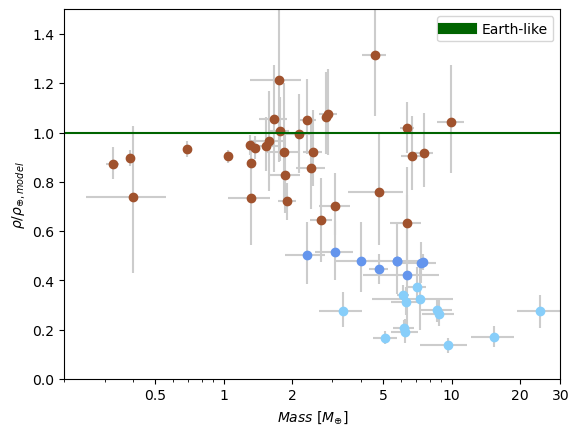

In [28]:
for i in range(0,len(mass)):
    if density[i] > 0.6:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "Sienna")
        density_rock.append(density[i])
        print([mass[i],radius[i],planet_temp[i]])
        print(planet_name[i])
    elif density[i] < 0.4:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "lightskyblue")     
        density_gas.append(density[i])

    else:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "cornflowerblue")
        density_water.append(density[i])

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('$ρ / ρ_{⊕,model}$')
plt.plot(earth_like_rocky["Mass"],np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")
plt.xscale("log")
plt.ylim(0,1.5)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)

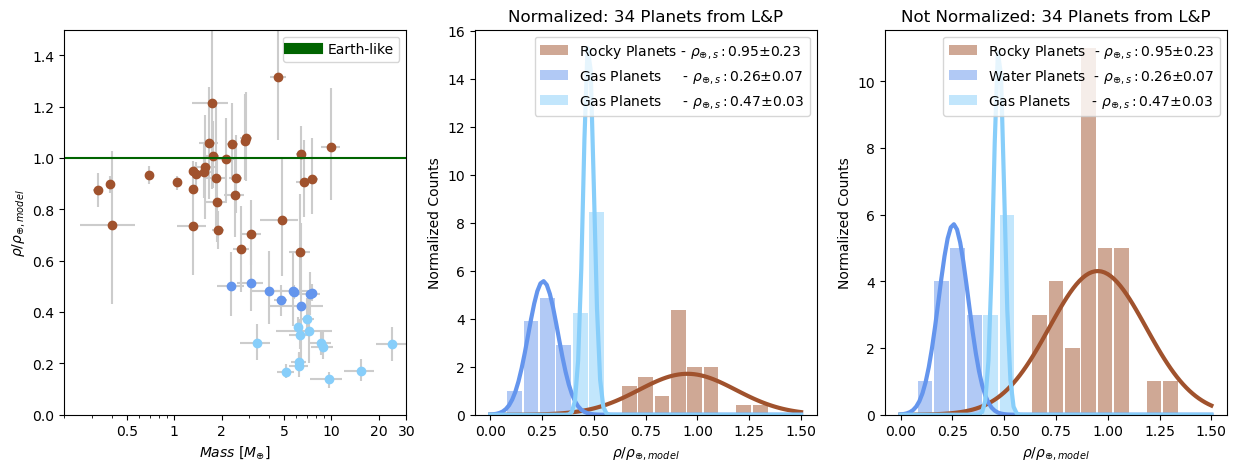

In [598]:
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 3, 1)
density_rock = []; density_water = []; density_gas = []
for i in range(0,len(mass)):
    if density[i] > 0.6:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "Sienna")
        density_rock.append(density[i])
    elif density[i] < 0.4:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "lightskyblue")     
        density_water.append(density[i])
    else:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "cornflowerblue")
        density_gas.append(density[i])

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('$ρ / ρ_{⊕,model}$')
plt.plot(earth_like_rocky["Mass"],np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")
plt.xscale("log")
plt.ylim(0,1.5)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)
    
plt.subplot(1, 3, 2)
hist_values_false, bin_edges, _ = plt.hist(density_rock, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rock)
sigma = np.sqrt(np.cov(density_rock, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_water, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water)
sigma = np.sqrt(np.cov(density_water, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_gas, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=True)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_gas)
sigma = np.sqrt(np.cov(density_gas, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))
plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
plt.title('Normalized: 34 Planets from L&P')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)


plt.subplot(1, 3, 3)
hist_values_false, bin_edges, _ = plt.hist(density_rock, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rock)
sigma = np.sqrt(np.cov(density_rock, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_water, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water)
sigma = np.sqrt(np.cov(density_water, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Planets  - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_gas, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_gas)
sigma = np.sqrt(np.cov(density_gas, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
plt.title('Not Normalized: 34 Planets from L&P')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)


In [9]:
density_rock = []; density_water = []; density_gas = []
for i in range(0,len(mass)):
    if density[i] > 0.6:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "Sienna")
        density_rock.append(density[i])
    elif density[i] < 0.4:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "lightskyblue")     
        density_water.append(density[i])
    else:
        plt.errorbar(mass[i],density[i],xerr = [[np.abs(mass_low[i])],[mass_up[i]]],yerr = [[np.abs(density_low[i])],[density_up[i]]],color= "0.8",zorder = -40)
        plt.scatter(mass[i],density[i],color = "cornflowerblue")
        density_gas.append(density[i])

plt.xscale("log")
plt.hlines(0.48,0.2,30)
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('$ρ / ρ_{⊕,model}$')
plt.plot(earth_like_rocky["Mass"],np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")
plt.xscale("log")
plt.ylim(0,1.5)
plt.xlim(0.2,30)
plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend()

NameError: name 'mass' is not defined

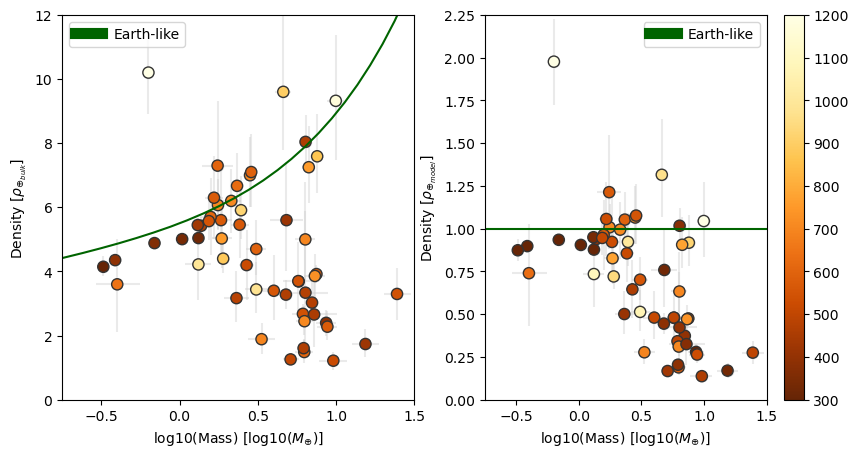

In [585]:
density_norm = np.concatenate((np.array(density1), np.array(density2)))
density_up_norm  = np.concatenate((np.array(density_up1), np.array(density_up2))) 
density_low_norm = np.concatenate((np.array(density_low1),np.array(density_low2)))
density_err_norm = [np.abs(density_low_norm),density_up_norm]
norm = mcolors.Normalize(vmin=300, vmax=1200)
cmap = plt.cm.get_cmap('YlOrBr_r')

fig, ax = plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(mass10, density_norm,c=planet_temp, cmap=cmap, marker='o',s=65, edgecolors='0.2')   
plt.errorbar(mass10, density_norm,xerr = mass10_err, yerr = density_err_norm,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.plot(np.log10(earth_like_rocky["Mass"]),rocky_density(list(earth_like_rocky["Mass"])),"-",color = "Darkgreen",label = "Earth-like")

plt.xlim(-0.75,1.5)
plt.ylim(0,12)
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
plt.ylabel("Density $[ρ_{ \oplus_{bulk}}]$")

leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.subplot(1, 2, 2)
plt.scatter(mass10, density, c=planet_temp, cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
plt.errorbar(mass10, density,xerr = mass10_err, yerr = density_err,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.plot(np.log10(earth_like_rocky["Mass"]),np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")

plt.xlim(-0.75,1.5)
plt.ylim(0,2.25)
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
plt.ylabel("Density $[ρ_{ \oplus_{model}}]$")

leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
cbar = plt.colorbar()

image_name = 'Density_spaces.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

# GMM: Normalized Density

log_likelihood: -0.076
bic: 40.4163
aic: 24.3577


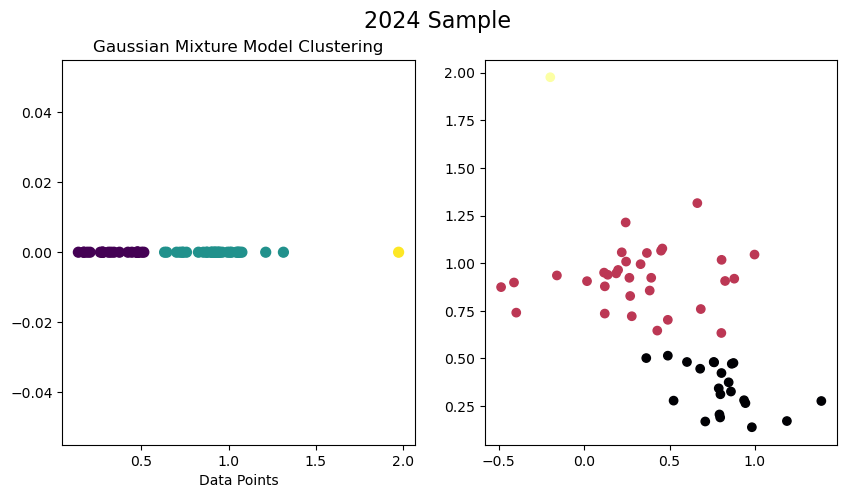

In [729]:
density = np.concatenate((np.array(density1) / rocky_density(mass1), np.array(density2)/ rocky_density(mass2)));
data = np.array(density)
data = data.reshape(-1, 1)
n_components = 3
gmm = GaussianMixture(n_components=n_components, init_params='kmeans')
gmm.fit(data)
labels = gmm.predict(data)

log_likelihood = gmm.score(data)
bic = gmm.bic(data)
aic = gmm.aic(data)
log_likelihood_list.append(log_likelihood)
bic_list.append(bic)
aic_list.append(aic)
print("log_likelihood: "+str(np.round(log_likelihood,4)))
print("bic: "+str(np.round(bic,4)))
print("aic: "+str(np.round(aic,4)))

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(1, 2, 1)
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Data Points')

plt.subplot(1, 2, 2)
plt.scatter(mass10,density, c=labels, cmap="inferno",)

log_likelihood: -0.0957
bic: 30.2838
aic: 20.3389
[0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0]
log_likelihood: 0.0102
bic: 30.8154
aic: 14.9036


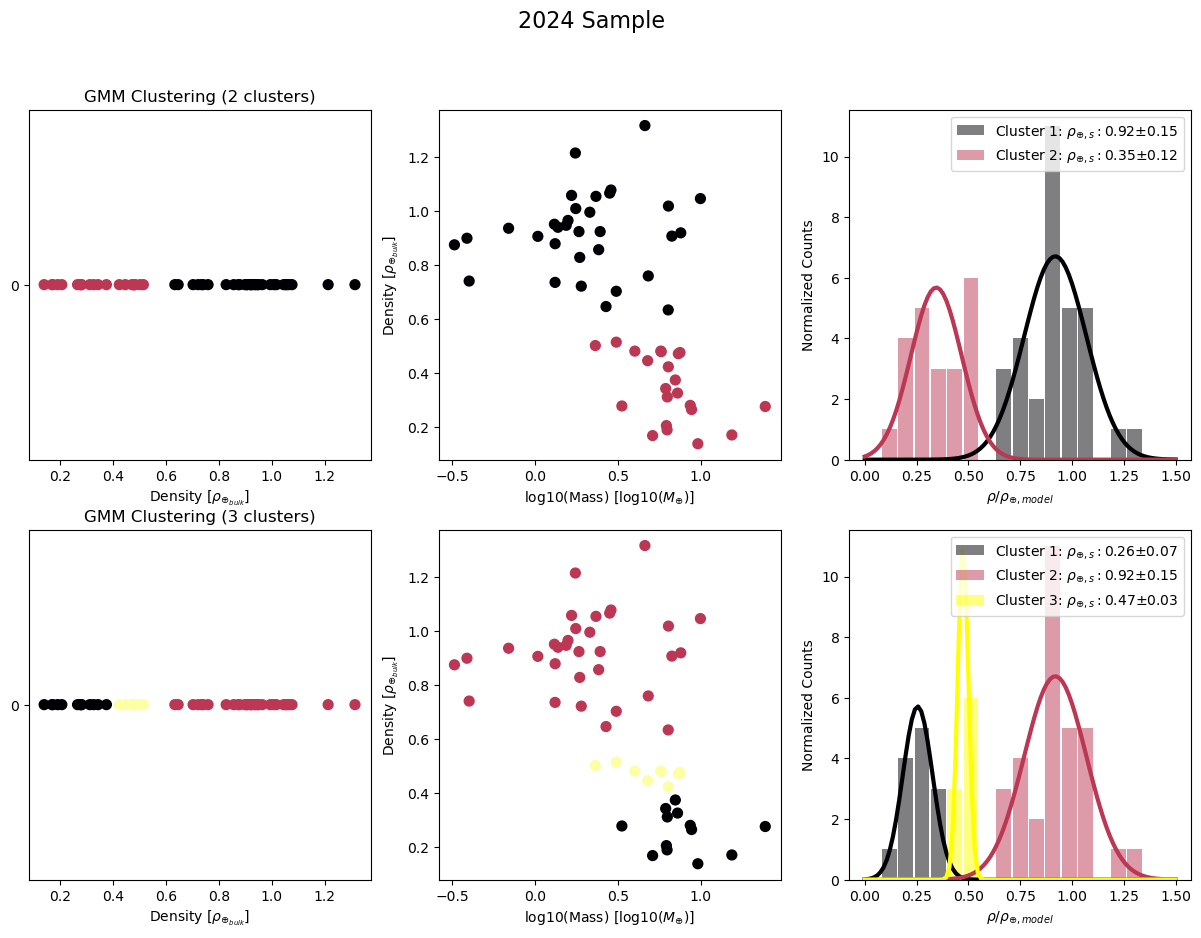

In [809]:
density = np.concatenate((np.array(density1) / rocky_density(mass1), np.array(density2)/ rocky_density(mass2)));
density = list(density)
density.pop(36)
mass10      = np.log10(mass)
mass10 = list(mass10)
mass10.pop(36)

norm = plt.Normalize(labels.min(), labels.max())

data = np.array(density)
data = data.reshape(-1, 1)
n_components = 2
gmm = GaussianMixture(n_components=n_components, init_params='kmeans')
gmm.fit(data)
labels = gmm.predict(data)

log_likelihood = gmm.score(data)
bic = gmm.bic(data)
aic = gmm.aic(data)
log_likelihood_list.append(log_likelihood)
bic_list.append(bic)
aic_list.append(aic)
print("log_likelihood: "+str(np.round(log_likelihood,4)))
print("bic: "+str(np.round(bic,4)))
print("aic: "+str(np.round(aic,4)))

denisty_cluster0 = []; denisty_cluster1 = []; denisty_cluster2 = []; 
for i in range(0,len(labels)):
    if labels[i] == 0:
        denisty_cluster0.append(density[i])
    if labels[i] == 1:
        denisty_cluster1.append(density[i])

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(2, 3, 1)
plt.scatter(data, np.zeros_like(data), c=labels, cmap='inferno',norm=norm, s=50)
plt.title('GMM Clustering (2 clusters)')
plt.xlabel("Density $[ρ_{ \oplus_{bulk}}]$")
plt.yticks([0], ["0"])

plt.subplot(2, 3, 2)
plt.scatter(mass10,density, c=labels, cmap="inferno",norm=norm, s=50)
plt.ylabel("Density $[ρ_{ \oplus_{bulk}}]$")
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
        
plt.subplot(2, 3, 3)

inferno_cmap = plt.get_cmap("inferno")

color_label_0 = inferno_cmap(-1)
color_label_1 = inferno_cmap(0.5)
color_label_2 = inferno_cmap(1)

hist_values_false, bin_edges, _ = plt.hist(denisty_cluster0, bins=bins, color=color_label_0, alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(denisty_cluster0)
sigma = np.sqrt(np.cov(denisty_cluster0, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = color_label_0,linewidth=3)
plt.hist(100, bins=bins, color=color_label_0, alpha=0.5,rwidth=0.9, density=True,label ="Cluster 1: "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(denisty_cluster1, bins=bins, color=color_label_1, alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(denisty_cluster1)
sigma = np.sqrt(np.cov(denisty_cluster1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = color_label_1,linewidth=3)
plt.hist(100, bins=bins, color=color_label_1, alpha=0.5,rwidth=0.9, density=True,label ="Cluster 2: "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)

#image_name = 'GMM_grid.png'
#image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)


plt.subplot(2, 3, 4)
n_components = 3
gmm = GaussianMixture(n_components=n_components, init_params='kmeans')
gmm.fit(data)
labels = gmm.predict(data)

log_likelihood = gmm.score(data)
bic = gmm.bic(data)
aic = gmm.aic(data)
log_likelihood_list.append(log_likelihood)
bic_list.append(bic)
aic_list.append(aic)
print("log_likelihood: "+str(np.round(log_likelihood,4)))
print("bic: "+str(np.round(bic,4)))
print("aic: "+str(np.round(aic,4)))

denisty_cluster0 = []; denisty_cluster1 = []; denisty_cluster2 = []; 
for i in range(0,len(labels)):
    if labels[i] == 0:
        denisty_cluster0.append(density[i])
    if labels[i] == 1:
        denisty_cluster1.append(density[i])
plt.scatter(data, np.zeros_like(data), c=labels, cmap='inferno',norm=norm, s=50)
plt.title('GMM Clustering (3 clusters)')
plt.yticks([0], ["0"])
plt.xlabel("Density $[ρ_{ \oplus_{bulk}}]$")

plt.subplot(2, 3, 5)
plt.scatter(mass10,density, c=labels, cmap="inferno",norm=norm, s=50)
plt.ylabel("Density $[ρ_{ \oplus_{bulk}}]$")
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")

denisty_cluster0 = []; denisty_cluster1 = []; denisty_cluster2 = []; 
for i in range(0,len(labels)):
    if labels[i] == 0:
        denisty_cluster0.append(density[i])
    if labels[i] == 1:
        denisty_cluster1.append(density[i])
    if labels[i] == 2:
        denisty_cluster2.append(density[i])

plt.subplot(2, 3, 6)

inferno_cmap = plt.get_cmap("inferno")

color_label_0 = inferno_cmap(-1)
color_label_1 = inferno_cmap(0.5)
color_label_2 = inferno_cmap(1)


hist_values_false, bin_edges, _ = plt.hist(denisty_cluster0, bins=bins, color=color_label_0, alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(denisty_cluster0)
sigma = np.sqrt(np.cov(denisty_cluster0, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = color_label_0,linewidth=3)
plt.hist(100, bins=bins, color=color_label_0, alpha=0.5,rwidth=0.9, density=True,label ="Cluster 1: "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(denisty_cluster1, bins=bins, color=color_label_1, alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(denisty_cluster1)
sigma = np.sqrt(np.cov(denisty_cluster1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = color_label_1,linewidth=3)
plt.hist(100, bins=bins, color=color_label_1, alpha=0.5,rwidth=0.9, density=True,label ="Cluster 2: "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(denisty_cluster2, bins=bins, color="yellow", alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(denisty_cluster2)
sigma = np.sqrt(np.cov(denisty_cluster2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "yellow",linewidth=3)
plt.hist(100, bins=bins, color="yellow", alpha=0.5,rwidth=0.9, density=True,label ="Cluster 3: "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('$ρ / ρ_{⊕,model}$')
plt.ylabel('Normalized Counts')
leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(8.0)

image_name = 'GMM_grid.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)




mass10      = np.log10(mass)
density = np.concatenate((np.array(density1) / rocky_density(mass1), np.array(density2)/ rocky_density(mass2)));


RGB values for label 0: (0.001462, 0.000466, 0.013866, 1.0)
RGB values for label 1: (0.735683, 0.215906, 0.330245, 1.0)
RGB values for label 2: (0.002267, 0.00127, 0.01857, 1.0)


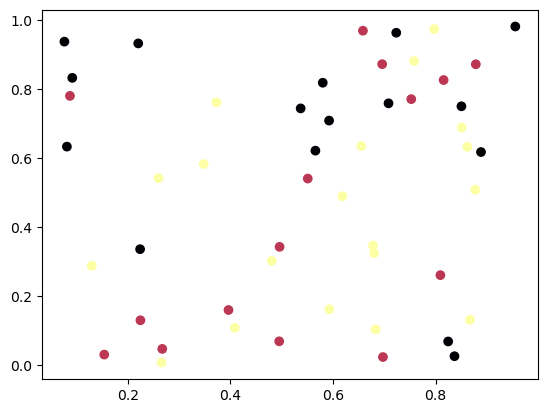

In [786]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data and labels
data = np.random.rand(50)
mass10 = np.random.rand(50)
density = np.random.rand(50)
labels = np.random.choice([0, 1, 2], size=50)

# Create a scatter plot with the inferno colormap
scatter_plot = plt.scatter(mass10, density, c=labels, cmap="inferno")

# Get the colormap
inferno_cmap = plt.get_cmap("inferno")

# Get RGB values for labels 0, 1, and 2
color_label_0 = inferno_cmap(0)
color_label_1 = inferno_cmap(0.5)  # 0.5 is the middle point in the colormap
color_label_2 = inferno_cmap(1)

# Print the RGB values
print("RGB values for label 0:", color_label_0)
print("RGB values for label 1:", color_label_1)
print("RGB values for label 2:", color_label_2)

# Show the plot
plt.show()


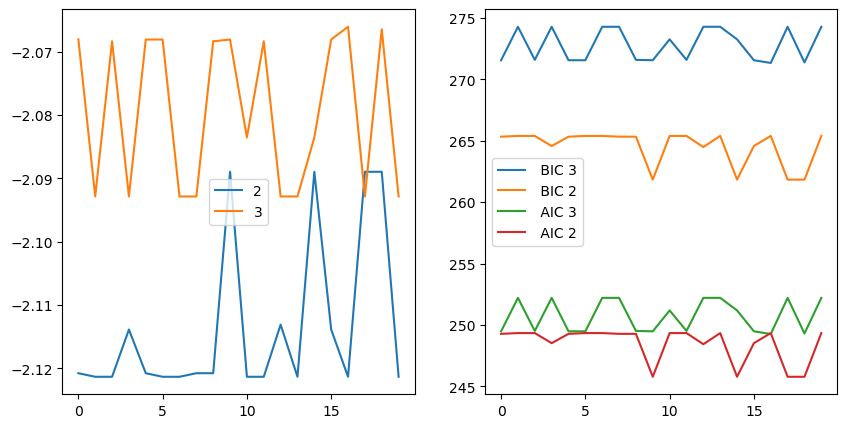

In [663]:
fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(log_likelihood_list_2,label = "2")
plt.plot(log_likelihood_list_3,label = "3")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(bic_list_3,label= " BIC 3")
plt.plot(bic_list_2,label= " BIC 2")
plt.plot(aic_list_3,label= " AIC 3")
plt.plot(aic_list_2,label= " AIC 2")
plt.legend()

# GMM: Non-normalized

log_likelihood: -2.089
bic: 261.8432
aic: 245.7845


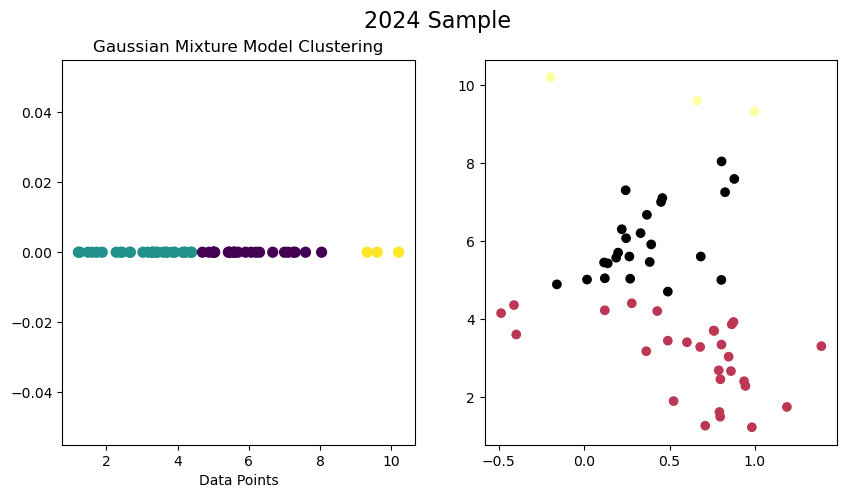

In [661]:
data = density_norm
data = data.reshape(-1, 1)
n_components = 3
gmm = GaussianMixture(n_components=n_components, init_params='kmeans')
gmm.fit(data)
labels = gmm.predict(data)

log_likelihood = gmm.score(data)
bic = gmm.bic(data)
aic = gmm.aic(data)
log_likelihood_list.append(log_likelihood)
bic_list.append(bic)
aic_list.append(aic)
print("log_likelihood: "+str(np.round(log_likelihood,4)))
print("bic: "+str(np.round(bic,4)))
print("aic: "+str(np.round(aic,4)))


fig, ax = plt.subplots(figsize=(10,5))

fig.suptitle('2024 Sample', fontsize=16)

plt.subplot(1, 2, 1)
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Data Points')

plt.subplot(1, 2, 2)
plt.scatter(mass10,density_norm, c=labels, cmap="inferno",)

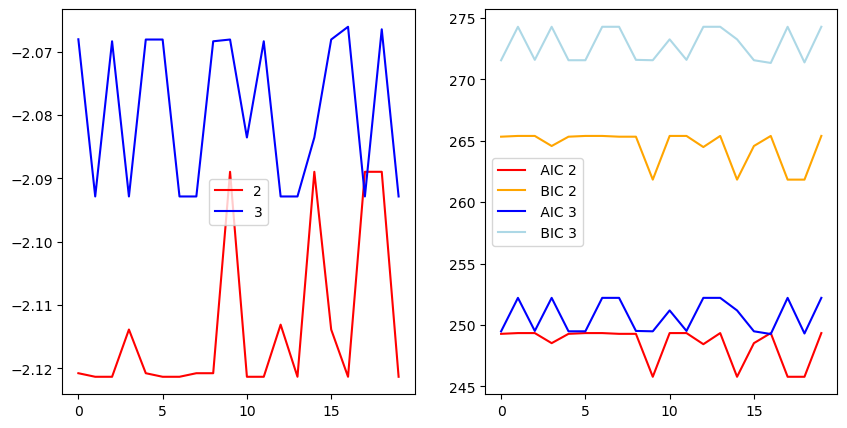

In [642]:
log_likelihood_list_3 =[]; bic_list_3 =[]; aic_list_3 = []
log_likelihood_list_2 =[]; bic_list_2 =[]; aic_list_2 = []
data = density_norm
data = data.reshape(-1, 1)
for i in range(0,20):
    n_components = 4
    gmm = GaussianMixture(n_components=n_components, init_params='kmeans')
    gmm.fit(data)
    labels = gmm.predict(data)
    log_likelihood = gmm.score(data); 
    bic = gmm.bic(data); aic = gmm.aic(data)
    log_likelihood_list_3.append(log_likelihood)
    bic_list_3.append(bic)
    aic_list_3.append(aic)
    
    n_components = 3
    gmm = GaussianMixture(n_components=n_components, init_params='kmeans')
    gmm.fit(data)
    labels = gmm.predict(data)
    log_likelihood = gmm.score(data)
    bic = gmm.bic(data); aic = gmm.aic(data)
    log_likelihood_list_2.append(log_likelihood)
    bic_list_2.append(bic)
    aic_list_2.append(aic)
    
fig, ax = plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(log_likelihood_list_2,label = "2",color = "red")
plt.plot(log_likelihood_list_3,label = "3",color = "blue")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(aic_list_2,label= " AIC 2",color = "red")
plt.plot(bic_list_2,label= " BIC 2",color = "orange")
plt.plot(aic_list_3,label= " AIC 3",color = "blue")
plt.plot(bic_list_3,label= " BIC 3",color = "lightblue")
plt.legend()

In [643]:
density

array([1.0173022 , 1.00811376, 1.05325345, 0.91829817, 0.51395077,
       0.82740016, 0.85604084, 0.50138072, 0.47883442, 0.47562473,
       0.92290608, 0.90622145, 1.05682803, 0.92299368, 0.37401067,
       0.28007228, 0.48077259, 1.06533975, 0.18944283, 0.7350329 ,
       0.93888719, 0.9501256 , 0.8983401 , 0.9352722 , 0.90530759,
       0.87810191, 0.87403311, 1.3151875 , 0.96415975, 0.34241469,
       0.44535916, 0.27588981, 0.2647121 , 0.17065877, 0.13820504,
       0.27785197, 1.97633809, 1.2135846 , 0.72106601, 0.99457608,
       0.70220018, 0.16832545, 0.20519987, 0.73998604, 1.07677182,
       0.94620182, 1.04499389, 0.3112479 , 0.75888561, 0.47122156,
       0.32567651, 0.63315746, 0.48092262, 0.42277977, 0.64566534])

# Histograms

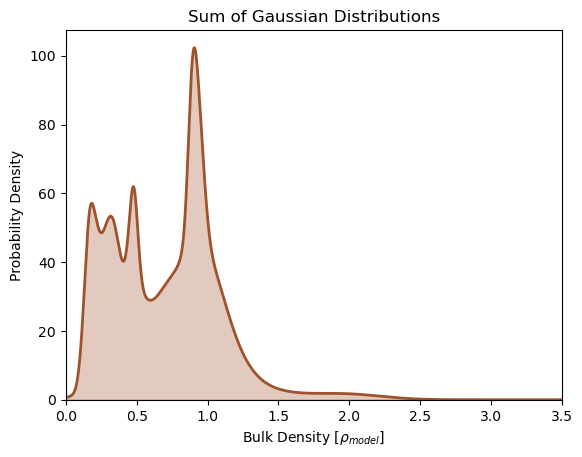

In [457]:
plt.xlim(0,6)
y_total = 0
x = np.linspace(0, 6, 100000)
for i in range(0,len(density)):
    mu, sigma = density[i], (density_up[i]+ abs(density_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "Sienna")
plt.fill_between(x, 0, y_total, color="Sienna", alpha=0.3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=False)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{model}]$")
plt.ylabel('Probability Density')
plt.xlim(0,3.5)
plt.show()

In [288]:
fig, ax = plt.subplots(figsize=(5,5))
plt.errorbar(mass10, density,xerr = mass10_err, yerr = density_err,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.scatter(mass10, density, c=labels, cmap='viridis', s=50, alpha=0.8)
min_points = np.arange(3, 21, 1)
df = pd.DataFrame({'Mass10': mass10, 'Density_norm': density})
dbscan = DBSCAN(eps=0.16, min_samples=7)
labels = dbscan.fit_predict(df)
plt.xlim(-0.75,1.5)
plt.ylim(0,2.25)
plt.xlabel("log10(Mass) [log10($M_{\oplus})]$")
plt.ylabel("Density $[ρ_{ \oplus_{model}}]$")
plt.plot(np.log10(earth_like_rocky["Mass"]),np.array(rocky_density(list(earth_like_rocky["Mass"]))) / np.array(rocky_density(list(earth_like_rocky["Mass"]))),"-",color = "Darkgreen",label = "Earth-like")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
    
density_cluster_1 = [density[i] for i in range(len(labels)) if labels[i] == 0]
density_cluster_2 = [density[i] for i in range(len(labels)) if labels[i] == 1]
density_outliers  = [density[i] for i in range(len(labels)) if labels[i] == -1]

density_cluster_1_up   = [density_up[i] for i in range(len(labels)) if labels[i]  == 0]
density_cluster_1_low  = [density_low[i] for i in range(len(labels)) if labels[i] == 0]
density_cluster_2_up   = [density_up[i] for i in range(len(labels)) if labels[i]  == 1]
density_cluster_2_low  = [density_low[i] for i in range(len(labels)) if labels[i] == 1]
density_outliers_up    = [density_up[i] for i in range(len(labels)) if labels[i]  == -1]
density_outliers_low   = [density_low[i] for i in range(len(labels)) if labels[i] == -1]


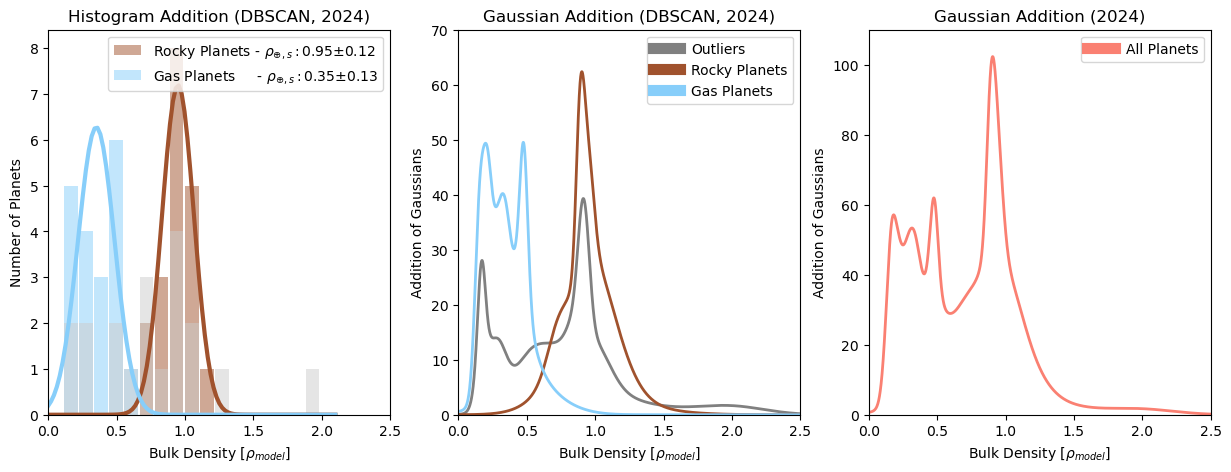

In [458]:
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 3, 1)
bins  = np.linspace(0, 2.1, 20)
pbins = np.linspace(0, 2.1, 100)
hist_values_false, bin_edges, _ = plt.hist(density_cluster_1, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_cluster_1)
sigma = np.sqrt(np.cov(density_cluster_1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_cluster_2, bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_cluster_2)
sigma = np.sqrt(np.cov(density_cluster_2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Gas Planets     - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(density_outliers, bins=bins, color='0.8', alpha=0.5, rwidth=0.9, density=False)
plt.xlim(0,2.5)
plt.ylabel("Number of Planets")
plt.xlabel("Bulk Density $[ρ_{model}]$")
plt.title("Histogram Addition (DBSCAN, 2024)")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.subplot(1, 3, 2)
x = np.linspace(0, 2.5, 10000)
y_total = 0
for i in range(0,len(density_outliers)):
    mu, sigma = density_outliers[i], (density_outliers_up[i] + np.abs(density_outliers_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, label="Outliers", linestyle='-', linewidth=2,color= "0.5")
#plt.plot([1000,39393],[1000,1002],color = "0.8",label ="Individual Outliers")

y_total = 0
for i in range(0,len(density_outliers)):
    mu, sigma = density_cluster_1[i], (density_cluster_1_up[i] + np.abs(density_cluster_1_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, label="Rocky Planets", linestyle='-', linewidth=2,color= "Sienna")
#plt.plot([1000,39393],[1000,1002],color = "Sienna",label ="Individual Outliers")

y_total = 0
for i in range(0,len(density_outliers)):
    mu, sigma = density_cluster_2[i], (density_cluster_2_up[i] + np.abs(density_cluster_2_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"lightskyblue",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, label="Gas Planets", linestyle='-', linewidth=2,color= "lightskyblue")
#plt.plot([1000,39393],[1000,1002],color = "lightskyblue",label ="Individual Outliers")
plt.title("Gaussian Addition (DBSCAN, 2024)")
plt.xlim(0,2.5)
plt.ylabel("Addition of Gaussians")
plt.xlabel("Bulk Density $[ρ_{model}]$")
plt.ylim(0,70)
plt.xlim(0,2.5)
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.subplot(1, 3, 3)
y_total = 0
for i in range(0,len(density)):
    mu, sigma = density[i], (density_up[i] + np.abs(density_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"lightskyblue",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, label="All Planets", linestyle='-', linewidth=2,color= "salmon")
plt.title("Gaussian Addition (2024)")
plt.ylim(0,110)
plt.xlim(0,2.5)
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.xlim(0,2.5)
plt.ylabel("Addition of Gaussians")
plt.xlabel("Bulk Density $[ρ_{model}]$")
image_name = 'Histograms.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

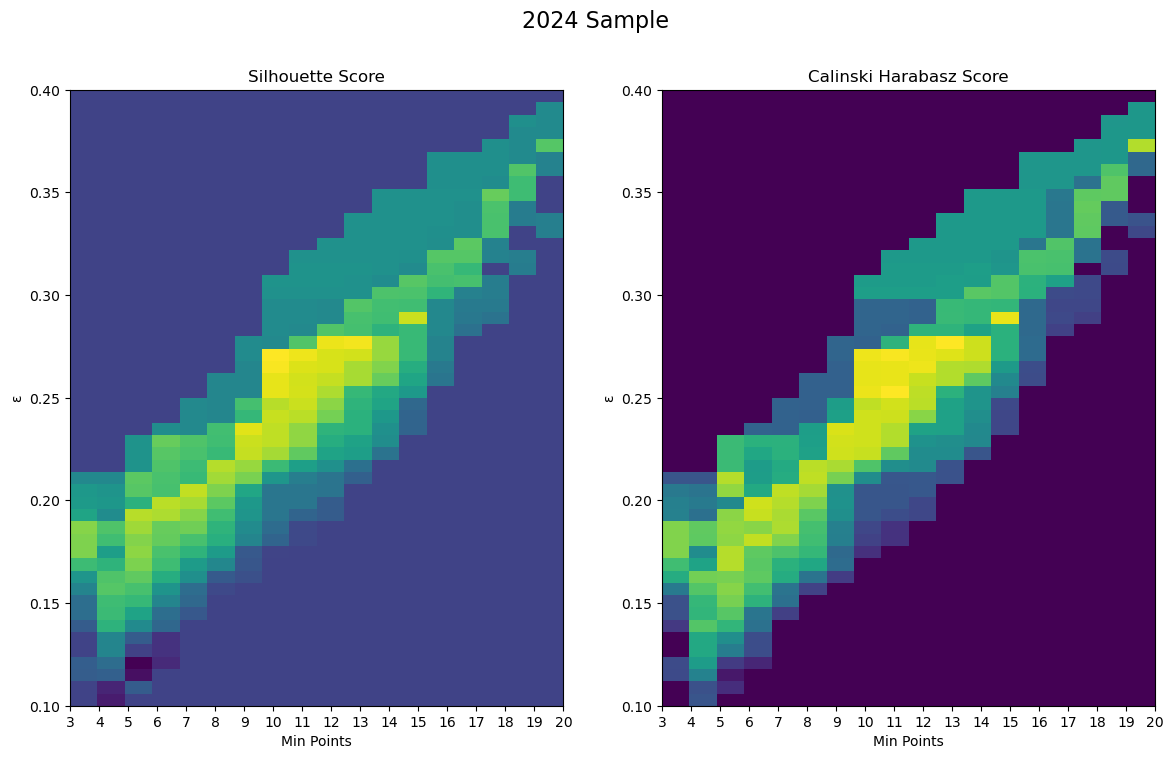

In [206]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('2024 Sample', fontsize=16)


ax1 = plt.subplot(1,2,1)
data = np.array([SS_save[f"SS{i}"] for i in range(3, 21)]).T.astype(float) /1000
img1 = ax1.imshow(data, cmap='viridis', origin='lower', extent=[3, 20, 0.1, 0.4], aspect='auto')
ax1.set_xticks(np.arange(3, 21, 1))
ax1.set_xticklabels([f"{i}" for i in range(3, 21)])
ax1.set_yticks([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax1.set_ylabel('ε')
ax1.set_xlabel('Min Points')
ax1.set_title('Silhouette Score')

ax2 = plt.subplot(1,2,2)
data = np.array([CH_save[f"CH{i}"] for i in range(3, 21)]).T.astype(float)/1000
img2 = ax2.imshow(data, cmap='viridis', origin='lower', extent=[3, 20, 0.1, 0.4], aspect='auto')
ax2.set_xticks(np.arange(3, 21, 1))
ax2.set_xticklabels([f"{i}" for i in range(3, 21)])
ax2.set_yticks([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax2.set_ylabel('ε')
ax2.set_xlabel('Min Points')
ax2.set_title('Calinski Harabasz Score')

plt.show()

In [10]:
data = np.array([[0.27915353, 0.22697851, 0.39490128, 0.0989667 ],
       [0.2627085 , 0.20315376, 0.29982954, 0.2343082 ],
       [0.22905381, 0.17468452, 0.2844142 , 0.31184742],
       [0.2691548 , 0.21839955, 0.38779932, 0.12464637],
       [0.2602872 , 0.20714563, 0.28598198, 0.24658518],
       [0.23754454, 0.18810229, 0.37324193, 0.20111121],
       [0.22729607, 0.17018509, 0.2031097 , 0.39940917],
       [0.23658015, 0.1701765 , 0.22158596, 0.37165737],
       [0.29031432, 0.21865776, 0.31636748, 0.17466043],
       [0.23790494, 0.16952139, 0.23521045, 0.35736322],
       [0.2471375 , 0.1836147 , 0.26912194, 0.30012587],
       [0.28604025, 0.22716255, 0.34027377, 0.14652346],
       [0.250877  , 0.20270534, 0.4057635 , 0.14065418],
       [0.47915575, 0.21936303, 0.18321936, 0.11826181],
       [0.4054834 , 0.26852667, 0.22309   , 0.10289998],
       [0.36915043, 0.28238603, 0.25301108, 0.09545243],
       [0.3516321 , 0.28203854, 0.28104603, 0.08528332],
       [0.38526526, 0.27616626, 0.23994885, 0.09861966],
       [0.33036995, 0.26617822, 0.31237623, 0.09107558],
       [0.38550806, 0.2708556 , 0.24160835, 0.10202796],
       [0.34520274, 0.27517354, 0.28830636, 0.09131735],
       [0.3136248 , 0.25019363, 0.34687027, 0.08931129],
       [0.65261745, 0.17236738, 0.12559555, 0.04941963],
       [0.724535  , 0.10083678, 0.09399093, 0.08063731],
       [0.72410876, 0.11038357, 0.08749489, 0.07801279],
       [0.64792186, 0.14514197, 0.12162556, 0.08531061],
       [0.65948087, 0.1294836 , 0.12081097, 0.09022453],
       [0.63733584, 0.15937957, 0.11960523, 0.08367935],
       [0.67051804, 0.13985367, 0.10795153, 0.08167674],
       [0.66320646, 0.13968079, 0.1176049 , 0.07950784],
       [0.72892576, 0.10847454, 0.08674239, 0.07585727],
       [0.706239  , 0.10023822, 0.10414223, 0.0893805 ],
       [0.7334756 , 0.09979159, 0.08668565, 0.08004713],
       [0.65982413, 0.10669575, 0.13891302, 0.09456711],
       [0.6711039 , 0.14922197, 0.10568516, 0.07398899],
       [0.669623  , 0.15393196, 0.10624307, 0.07020196],
       [0.6483959 , 0.17447808, 0.10430057, 0.07282544],
       [0.65950793, 0.16743344, 0.10606941, 0.06698929],
       [0.6325888 , 0.18858315, 0.1196477 , 0.05918034],
       [0.61297613, 0.20048222, 0.13003318, 0.05650844],
       [0.6246622 , 0.20099619, 0.11243739, 0.06190422],
       [0.8131877 , 0.05762044, 0.05860119, 0.07059068],
       [0.6970053 , 0.12110176, 0.09922148, 0.08267147],
       [0.9383387 , 0.00524588, 0.03001641, 0.02639904],
       [0.7944756 , 0.07339744, 0.06328204, 0.06884494],
       [0.62064964, 0.14417593, 0.1389216 , 0.09625289],
       [0.7145333 , 0.10667427, 0.09625801, 0.08253437],
       [0.54353553, 0.21449238, 0.15070823, 0.09126385],
       [0.6327216 , 0.13638483, 0.14695318, 0.0839404 ],
       [0.85038996, 0.05190939, 0.04267732, 0.05502333],
       [0.6841962 , 0.13362505, 0.1026384 , 0.07954036],
       [0.7251372 , 0.09640409, 0.09105412, 0.08740462],
       [0.53133845, 0.24563105, 0.16526243, 0.05776804],
       [0.49668837, 0.24252877, 0.1741093 , 0.08667357],
       [0.48926356, 0.2563192 , 0.16743988, 0.08697736]])

In [12]:
n_clusters = 3  # You can adjust this based on your requirements
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_jobs=1)
kmeans.fit(data)


TypeError: KMeans.__init__() got an unexpected keyword argument 'n_jobs'

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Data)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
predicted_labels = kmeans.labels_

AttributeError: 'NoneType' object has no attribute 'split'

# MDN

In [44]:
core_data = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\ExoMDN\ExoMDN\Planet_Layers\Core.txt",delimiter = "\t",header=None)
new_header = ['Planet Name', 'Core', 'Core_low','Core_up']
core_data.columns = new_header

mantle_data = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\ExoMDN\ExoMDN\Planet_Layers\Mantle.txt",delimiter = "\t",header=None)
new_header = ['Planet Name', 'Mantle', 'Mantle_low','Mantle_up']
mantle_data.columns = new_header

water_data = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\ExoMDN\ExoMDN\Planet_Layers\Water.txt",delimiter = "\t",header=None)
new_header = ['Planet Name', 'Water', 'Water_low','Water_up']
water_data.columns = new_header

atmosphere_data = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\ExoMDN\ExoMDN\Planet_Layers\Atmosphere.txt",delimiter = "\t",header=None)
new_header = ['Planet Name', 'Atmosphere', 'Atmosphere_low','Atmosphere_up']
atmosphere_data.columns = new_header

merged_df = pd.merge(core_data, mantle_data, on='Planet Name', how='inner')  # 'inner' means only common rows are included
merged_df = pd.merge(merged_df, water_data, on='Planet Name', how='inner')  # 'inner' means only common rows are included
merged_df = pd.merge(merged_df, atmosphere_data, on='Planet Name', how='inner')  # 'inner' means only common rows are included
merged_df.index = list(merged_df['Planet Name'])
merged_df = merged_df.drop('Planet Name', axis=1)


In [45]:
merged_df

,Core,Core_low,Core_up,Mantle,Mantle_low,Mantle_up,Water,Water_low,Water_up,Atmosphere,Atmosphere_low,Atmosphere_up
LTT 3780 c,0.288361,0.078167,0.081097,0.183767,0.144139,0.154873,0.440409,0.145602,0.143804,0.074538,0.049075,0.054878
K2-18 b,0.286483,0.090234,0.097259,0.133889,0.124624,0.130798,0.157757,0.154727,0.189365,0.188387,0.105438,0.084534
GJ 1214 b,0.221368,0.085941,0.077483,0.138642,0.108774,0.121532,0.224229,0.184844,0.171000,0.277684,0.088941,0.079250
TOI-270 c,0.280732,0.082204,0.083561,0.161143,0.138856,0.147773,0.426826,0.155732,0.175838,0.102666,0.061634,0.064698
K2-25 b,0.286807,0.082328,0.091967,0.113043,0.110399,0.130158,0.301369,0.167715,0.217614,0.234223,0.087166,0.091028
TOI-269 b,0.214678,0.104561,0.079283,0.102315,0.100049,0.116582,0.514354,0.184633,0.362555,0.131892,0.095610,0.067940
TOI-1231 b,0.236247,0.073745,0.066808,0.134071,0.109605,0.111965,0.145137,0.126588,0.131580,0.408816,0.066187,0.082701
AU Mic c,0.259441,0.074195,0.077479,0.067899,0.066527,0.107398,0.162448,0.136026,0.147079,0.375923,0.074174,0.078668
GJ 3090 b,0.292965,0.095724,0.077776,0.140292,0.138789,0.139924,0.255599,0.176579,0.171039,0.206246,0.089625,0.135347
Kepler-26 b,0.247093,0.083439,0.077000,0.065174,0.064026,0.106201,0.174039,0.145153,0.155346,0.377618,0.074852,0.102525


In [49]:
all_predictions = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\ExoMDN\ExoMDN\Planet_Layers\All_predictions.txt",delimiter = "\t",header=None)
new_header = ['Planet Name', 'Core', 'Mantle','Water',"Atmosphere"]
all_predictions.columns = new_header
all_predictions.index = list(all_predictions['Planet Name'])
all_predictions = all_predictions.drop('Planet Name', axis=1)

In [50]:
all_predictions

,Core,Mantle,Water,Atmosphere
LTT 3780 c,0.176408,0.581277,0.230672,0.011643
LTT 3780 c,0.320604,0.561363,0.064537,0.053496
LTT 3780 c,0.273228,0.580849,0.114318,0.031605
LTT 3780 c,0.293296,0.388348,0.228806,0.089551
LTT 3780 c,0.120358,0.391225,0.418522,0.069895
...,...,...,...,...
TOI-244 b,0.532080,0.165942,0.175381,0.126597
TOI-244 b,0.645422,0.083367,0.049468,0.221743
TOI-244 b,0.439753,0.202511,0.334886,0.022850
TOI-244 b,0.529935,0.167826,0.232018,0.070222


In [53]:
every_5000th_row = all_predictions.iloc[::5000]


In [54]:
every_5000th_row

,Core,Mantle,Water,Atmosphere
LTT 3780 c,0.176408,0.581277,0.230672,0.011643
K2-18 b,0.279298,0.385743,0.149031,0.185928
GJ 1214 b,0.221922,0.312258,0.175088,0.290732
TOI-270 c,0.308979,0.410809,0.164787,0.115425
K2-25 b,0.345069,0.078395,0.211059,0.365478
TOI-269 b,0.188134,0.697190,0.017990,0.096685
TOI-1231 b,0.238667,0.011420,0.290977,0.458936
AU Mic c,0.135696,0.114788,0.386927,0.362588
GJ 3090 b,0.325148,0.213885,0.223621,0.237347
Kepler-26 b,0.254493,0.093632,0.251884,0.399991


In [58]:
every_5000th_row["Core"]

LTT 3780 c      0.176408
K2-18 b         0.279298
GJ 1214 b       0.221922
TOI-270 c       0.308979
K2-25 b         0.345069
TOI-269 b       0.188134
TOI-1231 b      0.238667
AU Mic c        0.135696
GJ 3090 b       0.325148
Kepler-26 b     0.254493
Kepler-26 c     0.341122
TOI-1201 b      0.334676
TOI-1470 c      0.240682
TOI-1685 b      0.520415
L 98-59 d       0.432084
K2-146 b        0.415576
K2-146 c        0.364493
TOI-776 b       0.382857
TOI-270 d       0.241234
TOI-1470 b      0.340038
TOI-1801 b      0.313184
TOI-2136 b      0.290588
GJ 3053 b       0.670792
GJ 3053 c       0.704762
LHS 1478 b      0.721726
TOI-1634 b      0.643636
GJ 3473 b       0.716657
L 98-59 c       0.684843
GJ 357 b        0.696942
TOI-1235 b      0.698401
GJ 1132 b       0.667833
LTT 3780 b      0.707524
GJ 486 b        0.721613
GJ 1252 b       0.688711
TRAPPIST-1 b    0.680762
TRAPPIST-1 c    0.660925
TRAPPIST-1 d    0.710368
TRAPPIST-1 e    0.663128
TRAPPIST-1 f    0.602152
TRAPPIST-1 g    0.630688


In [60]:
list(every_5000th_row["Core"])

[0.1764075756072998,
 0.2792980670928955,
 0.2219221591949463,
 0.3089787364006042,
 0.3450686931610107,
 0.1881342530250549,
 0.2386672496795654,
 0.1356964111328125,
 0.3251475095748901,
 0.2544928789138794,
 0.3411221504211426,
 0.3346759080886841,
 0.2406815290451049,
 0.5204147696495056,
 0.4320838451385498,
 0.4155761003494262,
 0.3644933104515075,
 0.3828574419021606,
 0.2412338256835937,
 0.3400381803512573,
 0.313183844089508,
 0.2905877232551574,
 0.6707918643951416,
 0.7047620415687561,
 0.721725583076477,
 0.6436364650726318,
 0.7166568040847778,
 0.6848428845405579,
 0.6969422698020935,
 0.6984012126922607,
 0.6678329706192017,
 0.707523763179779,
 0.7216134667396545,
 0.6887105703353882,
 0.6807615756988525,
 0.6609253883361816,
 0.710368275642395,
 0.6631275415420532,
 0.60215163230896,
 0.6306883096694946,
 0.6870730519294739,
 0.8204272985458374,
 0.7211490273475647,
 0.9300198554992676,
 0.8177165985107422,
 0.5790430307388306,
 0.727103590965271,
 0.4937611818313598,

In [62]:
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'